<a href="https://colab.research.google.com/github/drpedrazas/Proyecto-Ciencia-de-Datos/blob/main/IDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# David Ricardo Pedraza Silva

# Initial Data Analysis

In this notebook we are going to make our first exploration regarding our data. Remember, first of all, that we are working with the dataset obtained through the efffort of Jianmo Ni, Jiacheng Li and Julian McAuley. The work in question: 

**Justifying recommendations using distantly-labeled reviews and fined-grained aspects**

**Jianmo Ni, Jiacheng Li, Julian McAuley**

**Empirical Methods in Natural Language Processing (EMNLP), 2019**

With these attributions out of the way I shall remark that a lot of the cleaning job regarding this dataset has already been done by these. Nevertheless, as our duty demands, it is necesary for us to make sure our data is suitable for what we are going to do.

#Metadata

Metada has been reduced to almost nothing. We do have, however, access to unix time for each review. 

It would be nice if we could use normal time instead of unix time. Let us convert it:

In [3]:
from datetime import datetime
import pandas as pd
df = pd.read_csv('/content/sample_data/Kindle_Store.csv', header=None)
df.columns = ['item','user','rating','timestamp']

We should chek if we got Null values before duing anything; we might get an error if that is indeed the case. It might in fact make the entire row unnusable, so it is desirable to get rid of these data should they display such patologies.

In [9]:
any([df['item'].isnull().values.any(), df['user'].isnull().values.any(), df['rating'].isnull().values.any(), df['timestamp'].isnull().values.any()])

False

We don't have any null values, which is excelent. Let us convert (this time for real) our unix timestamps to dates.

In [7]:
df['date'] = df['timestamp'].apply(lambda x: datetime.fromtimestamp(int(x)))

In [8]:
df.head()

,item,user,rating,timestamp,date
0,1423600150,A27UD5HYAKBL97,4.0,1356739200,2012-12-29
1,1423600150,A8P5DK8LLOYGH,5.0,1330992000,2012-03-06
2,1423600150,A3OM9W7DXSUIIY,5.0,1250035200,2009-08-12
3,1423600150,A3DPAR2PWB9BT8,3.0,1162512000,2006-11-03
4,1423600150,A2ONTBSAX7GIOV,5.0,1144713600,2006-04-11


Other than the user's review we lack any info on who they are or their demographics. Thus; our task will go towards compartmentalize users in boxes, as many as sensibly posible. In the end our prediction algorithm with fit a new user, given their reviews, on one of these boxes in order to recommend them new books.

#Screening

Ratings are the kernel of our operation. They are a quantitative indication of how much the user deems the product as a "good purchase". We want to know how much do these numbers tell us about the subjective quality of each book. 

We sumarize some important properties of this "rating" column:

In [11]:
df['rating'].describe()

count    5.722988e+06
mean     4.302052e+00
std      1.087467e+00
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

We ran into a problem. People rarely rate, or buy, books that they wont enjoy. This means that this dataset only tells us about the books each user has read. As you can se here, we have an overwhlming bias towards 5 star reviews. Here is a visual representation.

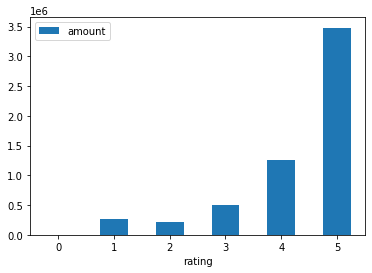

In [14]:
df2 = pd.DataFrame({'rating':[i for i in range(0,6)],'amount': [len(df[df['rating'] == float(i)]) for i in range(0,6)]})
df2.plot.bar(x='rating', y='amount', rot=0)

Our information is not as detailed as we thought. We still have plenty of data, so we can do this: take any rating of 4 or more as part of this customer's choices. All the other reviews will be taken as irrelevant or negative. 

These data encompass a wide stretch of time. We shall see if there is a bias towards a particular period.

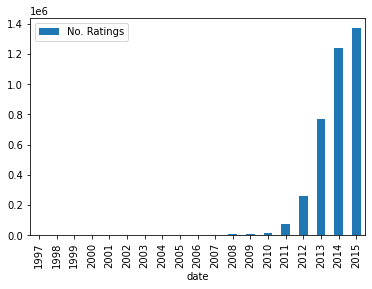

In [37]:
years = df['date'].dt.to_period('A').value_counts()
df3 = pd.DataFrame({'date':[i for i in range(1997,2016)], 'No. Ratings': [years.loc[str(i)] for i in range(1997,2016)]})
df3.plot.bar(x='date',y='No. Ratings')

We don't have data from 2016 onwards. Our distribution, however, is swayed towards the last years in our sample, which is good. It shouldn't a huge issue (old books are available in the future, future book are not available in the past).

We have a limited power of prediction, since this dataset is rather old. We might think on complementing our dataset, but for now we will work with what we have.

#Findings

We found out that our set is not as quantitative as we initially thought. We got a set that tells if a custoemr liked or didn't like a certain book instead of data regarding the quality of each item. We also found out that most of the data is very clusterd inbetween 2011 and 2015 to the point in which previous datapoints are easily dismissed. 

With this we might commence our project. We are going to clusterize types of customers, and use this algorithms to classify new customers based on their reviews. 